# Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Read Data

In [41]:
points = pd.read_excel('15-Points.xlsx')

points.shape

(15, 3)

In [42]:
points.head()

,x,y,City
0,5.500000e-08,9.860000e-09,1
1,-2.887330e+01,-7.980000e-08,2
2,-7.929160e+01,-2.140330e+01,3
3,-1.465770e+01,-4.338960e+01,4
4,-6.474730e+01,2.189820e+01,5


# Nearest Neighbor Algorithm

In [43]:
def nearest_neighbor(start_point_index=0, points=None):
    
    # Read default points if user didn't entered input
    if points is None:
        points = pd.read_excel('15-Points.xlsx')

    visited = np.array([False] * len(points))
    path = []

    current_city = start_point_index
    distances = []

    path.append(current_city)
    visited[0] = True

    while visited.sum() != len(points):
    
        # get euclidean distance matrix
        distance_matrix = np.linalg.norm(points.values[current_city][:2] - points.values[:, :2], axis=1)

        distance_matrix[current_city] = np.inf

        # get nearest city
        while True:
            nearest_city = np.argmin(distance_matrix)
            
            if not visited[nearest_city]:
                current_city = nearest_city
                break
            
            distance_matrix[nearest_city] = np.inf    
        
        distances.append(distance_matrix[nearest_city])
        path.append(nearest_city)
        visited[current_city] = True

    distances.append(np.linalg.norm(points.values[start_point_index][:2] - points.values[path[-1], :2]))
    path.append(start_point_index)

    return distances, path

In [44]:
distances, path = nearest_neighbor(start_point_index=0)

In [45]:
print(distances)

[22.710147825297707, 10.390598409359272, 20.33195751158619, 10.318773936321119, 20.358579404342038, 22.92069009063996, 22.75820510045028, 20.412598306928, 10.401326935540487, 22.760032284687117, 14.549321997261593, 22.70224944471363, 14.401837905281393, 20.63515020221954, 28.72962105340484]


In [46]:
sum(distances)

284.3810904080332

In [47]:
path

[0, 12, 1, 14, 8, 4, 6, 2, 11, 13, 9, 7, 5, 3, 10, 0]

# Visualization

In [48]:
Xs, Ys = points.values[path][:, 0], points.values[path][:, 1]
print(Xs)
print()
print(Ys)

[ 5.50000e-08 -2.14983e+01 -2.88733e+01 -4.30700e+01 -5.04808e+01
 -6.47473e+01 -7.20785e+01 -7.92916e+01 -6.50866e+01 -5.75687e+01
 -5.05859e+01 -3.60366e+01 -2.90585e+01 -1.46577e+01 -1.35819e-01
  5.50000e-08]

[ 9.86000e-09  7.31942e+00 -7.98000e-08  1.45548e+01  7.37447e+00
  2.18982e+01  1.81581e-01 -2.14033e+01 -3.60625e+01 -4.32506e+01
 -2.15882e+01 -2.16135e+01 -4.32167e+01 -4.33896e+01 -2.87293e+01
  9.86000e-09]


In [49]:
cities_name = list(map(lambda x: 'City '+x, list((points.values[path][:, 2]).astype('int').astype('str'))))
print(cities_name)

['City 1', 'City 13', 'City 2', 'City 15', 'City 9', 'City 5', 'City 7', 'City 3', 'City 12', 'City 14', 'City 10', 'City 8', 'City 6', 'City 4', 'City 11', 'City 1']


- *Visualization using matplotlib (Dynamic Figure)*

In [50]:
%matplotlib qt

# Toggle fullscreen mode for all plots
plt.rcParams['figure.figsize'] = [12, 8]

plt.scatter(Xs, Ys, color='C0')
for i in range(len(Xs[:-1])):
    plt.text(Xs[i], Ys[i]+2, f'{cities_name[i]}', ha='center')

for i in range(2, len(Xs)+1):
    plt.pause(0.5)
    plt.plot(Xs[:i], Ys[:i], color='C0')
    plt.title("Total Distance: {:.2f}".format(sum(distances[:i-1])))

plt.pause(2)
plt.close()

- *Visualization using matplotlib (Static Figure)*

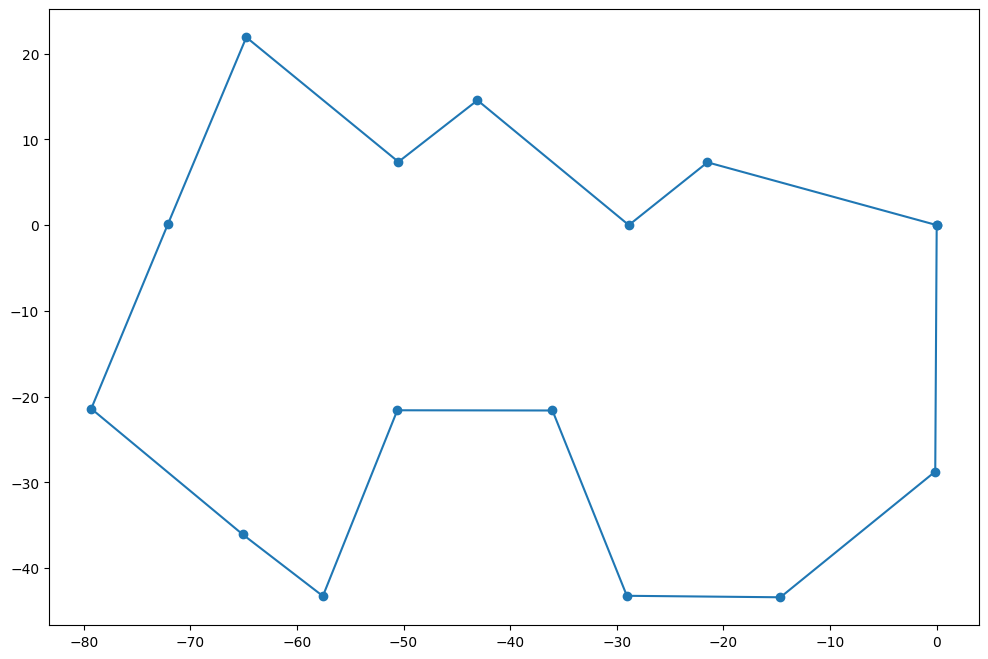

In [51]:
%matplotlib inline

_ = plt.plot(Xs, Ys, 'o-')
plt.show()

- *Visualization using Plotly*

In [52]:
px.line(x=Xs, y=Ys, hover_name=cities_name, markers=True)